In [80]:
import numpy as np
from scipy.integrate import solve_ivp, odeint
from scipy.fftpack import fft
from scipy.signal import find_peaks
# Define the FitzHugh-Nagumo model equations
def fitzhugh_nagumo(t, xy,alpha, z, w2, a, b):
    x, y = xy
    dxdt = alpha*(y + x - (x**3)/3 + z)
    dydt = -(1/alpha) * (w2*x - a + b*y)
    return [dxdt, dydt]

# Define events
def max_x_event(t, xy,alpha, z, w2, a, b):
    x, y = xy
    dxdt = alpha*(y + x - (x**3)/3 + z)
    return dxdt

# Define the initial conditions and parameter values
alpha = 3
a = 0.7
b = 0.8
w2 = 1
x0 = 0
y0 = 0
xy0=[x0, y0]
z_vals = np.linspace(-2, 0, num=200)
t_span = [0, 40]
t_eval = np.linspace(0,40,100000)

In [81]:
# Compute the intrinsic frequency as a function of stimulus intensity
freq_values = []
for z in z_vals:
    sol = solve_ivp(fitzhugh_nagumo, t_span, xy0, args=(alpha,z,w2,a,b),t_eval=t_eval,dense_output=True,events=(max_x_event, ),rtol=1e-15)

    v = sol.y[0]
    window = np.hamming(v.shape[0])
    v_wind = v * window   
    freq = np.fft.fftfreq(len(v_wind), 40/100000)[np.argmax(np.abs(np.fft.fft(v_wind)**2)[:v_wind.shape[0]//2])]
    if freq != 0:
        freq = 1/(sol.t[find_peaks(v)[0][1]]-sol.t[find_peaks(v)[0][0]])
    freq_values.append(freq)

/Users/timgu/opt/anaconda3/envs/ece1786/lib/python3.8/site-packages/scipy/integrate/_ivp/common.py:47: UserWarning: At least one element of `rtol` is too small. Setting `rtol = np.maximum(rtol, 2.220446049250313e-14)`.
  warn("At least one element of `rtol` is too small. "


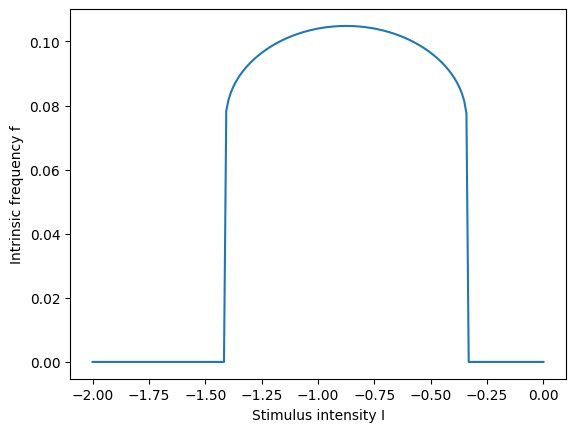

In [83]:
# Plot the intrinsic frequency as a function of stimulus intensity
import matplotlib.pyplot as plt
plt.plot(z_vals, freq_values)
plt.xlabel('Stimulus intensity I')
plt.ylabel('Intrinsic frequency f')
plt.show()

In [84]:
# zs = [-0.3,-0.4,-0.5,-0.6,-0.7]
zs = [-1.39]
vs = []
for z in zs:
    sol = solve_ivp(fitzhugh_nagumo, t_span, xy0, args=(alpha,z,w2,a,b), t_eval=t_eval, events=(max_x_event),rtol=1e-8)
    t = sol.t
    v = sol.y[0]
    vs.append(v)

In [85]:
np.abs(np.fft.fft(v)**2)

array([3.97919883e+09, 1.67879293e+08, 3.29524120e+08, ...,
       3.65830379e+09, 3.29524120e+08, 1.67879293e+08])

In [86]:
np.fft.fftfreq(len(v), 40/100000)[np.argmax(np.abs(np.fft.fft(v)**2)[:v.shape[0]//2])]

0.0

In [87]:
(v[find_peaks(v)[0][0]], v[find_peaks(v)[0][1]])

(1.712448398889418, 1.7124484476883215)

In [88]:
(sol.t[find_peaks(v)[0][1]],sol.t[find_peaks(v)[0][0]])


(21.82621826218262, 9.836498364983651)

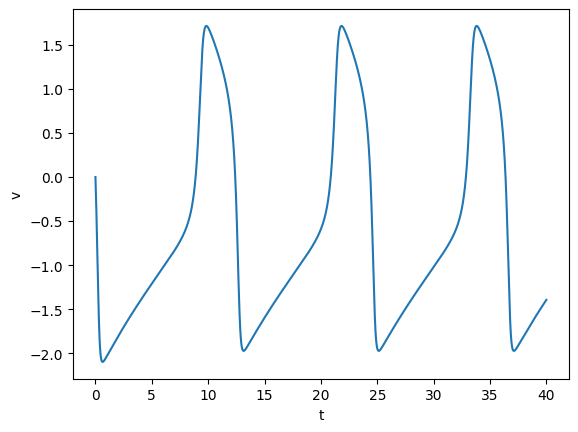

In [89]:
# plt.plot(t[0:100], (np.abs(np.fft.fft(v))**2)[0:100])
for v in vs:
    plt.plot(t, v)
plt.xlabel('t')
plt.ylabel('v')
plt.show()